**Histogram Equalization**

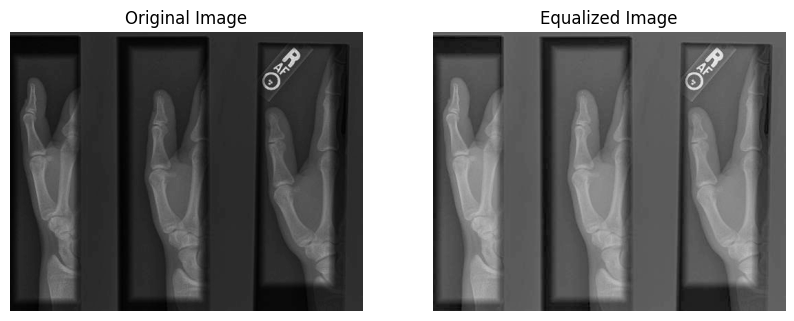

In [1]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to apply histogram equalization to a single image using PIL
def apply_histogram_equalization(image_path):
    try:
        # Open the image
        with Image.open(image_path) as img:
            # Convert the image to grayscale
            img_gray = img.convert('L')
            # Apply histogram equalization
            equalized_img = Image.eval(img_gray, lambda x: (255 * (x / 255) ** 0.5))
        return img_gray, equalized_img
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)
        return None, None

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = random.choice(image_files)

# Apply histogram equalization to the random image
original_image, equalized_image = apply_histogram_equalization(random_image_path)

# Display the original and equalized images
if original_image is not None and equalized_image is not None:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()
else:
    print("Failed to process the image.")

**Hist Dataset Conversion**

In [15]:
import os
from PIL import Image

# Function to apply histogram equalization to a single image using PIL
def apply_histogram_equalization(image_path):
    try:
        # Open the image
        with Image.open(image_path) as img:
            # Convert the image to grayscale
            img_gray = img.convert('L')
            # Apply histogram equalization
            equalized_img = Image.eval(img_gray, lambda x: (255 * (x / 255) ** 0.5))
        return equalized_img
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)
        return None

# Define the directory containing the original dataset
original_dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Define the directory to save the histogram equalized images
output_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Histogram_Resized_Dataset"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Traverse through the original dataset directory and its subdirectories
for root, _, files in os.walk(original_dataset_dir):
    for file in files:
        # Check if the file is an image
        if file.endswith('.jpg'):
            # Get the path of the image file
            image_path = os.path.join(root, file)
            # Apply histogram equalization to the image
            equalized_image = apply_histogram_equalization(image_path)
            if equalized_image is not None:
                # Define the output path for the equalized image
                output_path = os.path.join(output_dir, os.path.relpath(image_path, original_dataset_dir))
                # Create the output directory structure if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                # Save the equalized image
                equalized_image.save(output_path)

print("Histogram equalization applied to the entire dataset.")

Histogram equalization applied to the entire dataset.


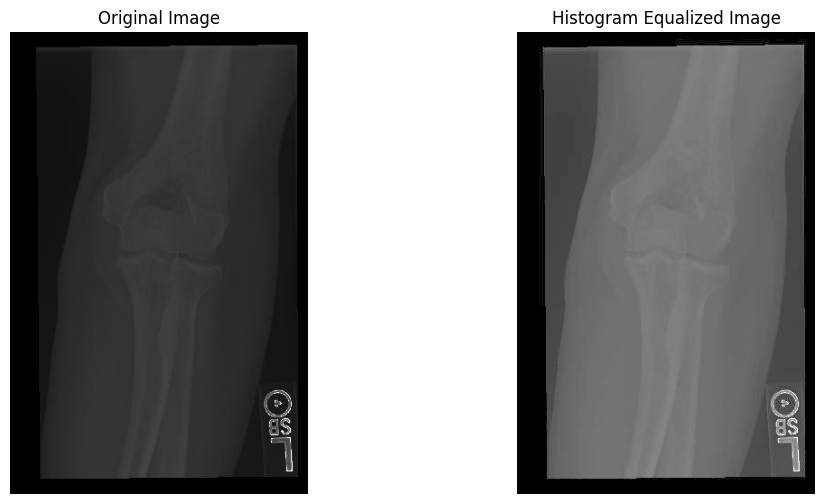

In [18]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the directories for the original and histogram-equalized datasets
original_dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"
histogram_dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Histogram_Resized_Dataset"

# Get a list of all image files in the original dataset directory
original_image_files = []
for root, _, files in os.walk(original_dataset_dir):
    for file in files:
        if file.endswith(".jpg"):
            original_image_files.append(os.path.join(root, file))

# Choose a random image from the original dataset
random_image_path = random.choice(original_image_files)

# Load the random image from the original dataset
original_image = Image.open(random_image_path)

# Construct the path to the corresponding image in the histogram-equalized dataset
histogram_image_path = os.path.join(histogram_dataset_dir, os.path.relpath(random_image_path, original_dataset_dir))

# Load the corresponding image from the histogram-equalized dataset
histogram_image = Image.open(histogram_image_path)

# Plot the original and histogram-equalized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(histogram_image, cmap='gray')  # Display in grayscale
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.show()